#  Datenvisualisierung - Boxplots und Violin Plots 


Schön, dass du wieder dabei bist! Heute beschäftigen wir uns weiter damit, wie man Daten in R visualisieren kann. Nach *Barplots* und *Lollipop Plots* schauen wir uns hier jetzt *Boxplots* und *Violinplots* an. Im Gegensatz zu den beiden schon bekannten Plots, erlauben uns **Boxplots** und **Violinplots** Aussagen über die *Verteilung von numerischen Variablen* zu treffen.

Die Datengrundlage, mit der wir heute arbeiten, ist ein Datensatz mit den Ergebnissen der *Bundestagswahl 2017 in Bielefeld*. Der Datensatz enthält verschiedene Variablen zum Wahlverhalten in den Bielefelder Stimmbezirken. Sowohl *Boxplots* als auch *Violinplots* erlauben uns, das Wahlverhalten für bestimmte Parteien in allen Bielefelder Stimmbezirken in einer Visualisierung zu betrachten und beispielsweise die Frage zu beantworten, für welche Partei es die stärksten Schwankungen in den Wahlergebnissen zwischen den Stimmbezirken gibt.

Wir beginnen wie gewohnt mit dem Laden der nötigen Pakete. 

In [1]:
#benoetigte Pakete laden
library("here")
library("tidyverse")
library("car")
library("psych")


Warning message:
"Paket 'here' wurde unter R Version 4.1.1 erstellt"
here() starts at C:/Users/kweiss1/Documents/Datengeschichten

Warning message:
"Paket 'tidyverse' wurde unter R Version 4.1.1 erstellt"
-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"Paket 'ggplot2' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'dplyr' wurde unter R Version 4.1.1 erstellt"
-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Lade nötiges Paket: carData


Attache Paket: 'car'


Das folgende Objekt ist maskie

# Daten einlesen

Der Datensatz, den wir nutzen, liegt als *CSV-Datei* vor. Unsere Datengrundlage stellt die Datei "Daten_BWT_2017_BI" dar. Sie ist mit einem *Semikolon* getrennt und weist eine Kopfzeile mit den Variablennamen auf. Mit dem folgenden Befehl, den wir schon kennengelernt haben, können wir sie einlesen. Mit Hilfe des sapply-Befehls werfen wir außerdem direkt einen Blick auf die von R erkannten Klassen/Datentypen der einzelnen Variablen.

In [2]:
#csv Daten einlesen
data_Wahl <- read.csv2("Daten_BWT_2017_BI.csv", na="NA", header = TRUE,stringsAsFactors = FALSE, encoding = "latin1")
data_Wahl

#Variablen betrachten
sapply(data_Wahl, class)



Nr,Name,Wahlberechtigte,abgegeben,Wahlbeteiligung,gültig.Erststimme,ungültig.Erststimme,gültig.Zweitstimme,ungültig.Zweitstimme,CDU,...,Z_Gesundheitsforschung,Z_Gesundheitsforschung_Proz,Tierschutzpartei,Tierschutzpartei_Proz,Z_Tierschutzpartei,Z_Tierschutzpartei_Proz,V.Partei³,V.Partei³_Proz,Z_V.Partei³,Z_V.Partei³_Proz
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,...,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
001.1,Stimmbezirk 001.1,1231,604,49.07,599,5,600,4,132,...,0,0.00,0,0,2,0.33,0,0,3,0.50
001.2,Stimmbezirk 001.2,1394,701,50.29,699,2,700,1,226,...,0,0.00,0,0,6,0.86,0,0,3,0.43
001.3,Stimmbezirk 001.3,1440,626,43.47,614,12,620,6,116,...,0,0.00,0,0,8,1.29,0,0,1,0.16
001.4,Stimmbezirk 001.4,1185,546,46.08,536,10,540,6,83,...,0,0.00,0,0,6,1.11,0,0,3,0.56
001.5,Stimmbezirk 001.5,1513,693,45.80,687,6,689,4,125,...,1,0.15,0,0,5,0.73,0,0,3,0.44
001.6,Stimmbezirk 001.6,1363,586,42.99,582,4,583,3,124,...,0,0.00,0,0,2,0.34,0,0,1,0.17
002.1,Stimmbezirk 002.1,1539,759,49.32,751,8,753,6,185,...,0,0.00,0,0,3,0.40,0,0,5,0.66
002.2,Stimmbezirk 002.2,1348,678,50.30,677,1,678,0,172,...,0,0.00,0,0,4,0.59,0,0,0,0.00
002.3,Stimmbezirk 002.3,1300,644,49.54,640,4,641,3,138,...,0,0.00,0,0,5,0.78,0,0,1,0.16


Nr                                Name 
                        "character"                         "character" 
                    Wahlberechtigte                           abgegeben 
                          "integer"                           "integer" 
                    Wahlbeteiligung                   gültig.Erststimme 
                          "numeric"                           "integer" 
                ungültig.Erststimme                  gültig.Zweitstimme 
                          "integer"                           "integer" 
               ungültig.Zweitstimme                                 CDU 
                          "integer"                           "integer" 
                           CDU_Proz                               Z_CDU 
                          "numeric"                           "integer" 
                         Z_CDU_Proz                                 SPD 
                          "numeric"                           "integer" 
                           SPD_Proz                               Z_SPD 
                          "numeric"                           "integer" 
                         Z_SPD_Proz                               GRÜNE 
                          "numeric"                           "integer" 
                         GRÜNE_Proz                             Z_GRÜNE 
                          "numeric"                           "integer" 
                       Z_GRÜNE_Proz                           DIE.LINKE 
                          "numeric"                           "integer" 
                     DIE.LINKE_Proz                         Z_DIE.LINKE 
                          "numeric"                           "integer" 
                   Z_DIE.LINKE_Proz                                 FDP 
                          "numeric"                           "integer" 
                           FDP_Proz                               Z_FDP 
                          "numeric"                           "integer" 
                         Z_FDP_Proz                                 AfD 
                          "numeric"                           "integer" 
                           AfD_Proz                               Z_AfD 
                          "numeric"                           "integer" 
                         Z_AfD_Proz                             PIRATEN 
                          "numeric"                           "integer" 
                       PIRATEN_Proz                           Z_PIRATEN 
                          "integer"                           "integer" 
                     Z_PIRATEN_Proz                                 NPD 
                          "numeric"                           "integer" 
                           NPD_Proz                               Z_NPD 
                          "integer"                           "integer" 
                         Z_NPD_Proz                          Die.PARTEI 
                          "numeric"                           "integer" 
                    Die.PARTEI_Proz                        Z_Die.PARTEI 
                          "numeric"                           "integer" 
                  Z_Die.PARTEI_Proz                        FREIE.WÄHLER 
                          "numeric"                           "integer" 
                  FREIE.WÄHLER_Proz                      Z_FREIE.WÄHLER 
                          "integer"                           "integer" 
                Z_FREIE.WÄHLER_Proz                     Volksabstimmung 
                          "numeric"                           "integer" 
               Volksabstimmung_Proz                   Z_Volksabstimmung 
                          "integer"                           "integer" 
             Z_Volksabstimmung_Proz                                 ÖDP 
                          "numeric"                           "integer" 
                           ÖDP_Proz                               Z_ÖDP 
                  

Die Variablen liegen teilweise bereits mit der passenden Klasse/dem passenden Datentyp für die Darstellung als *Boxplot* oder *Violinplot* vor. Je nachdem, welche Variablen wir für unsere Datenvisualisierungen nutzen möchten, ist eine Aufbereitung aber noch notwendig. 

# Der erste Boxplot
Mit `boxplot()` können wir uns ein erstes Boxplot-Diagramm ausgeben lassen. Als Beispiel schauen wir uns den Boxplot zu den prozentualen Wahlergebnissen der Partei *Die Partei* für alle Bielefelder Stimmbezirke an. 

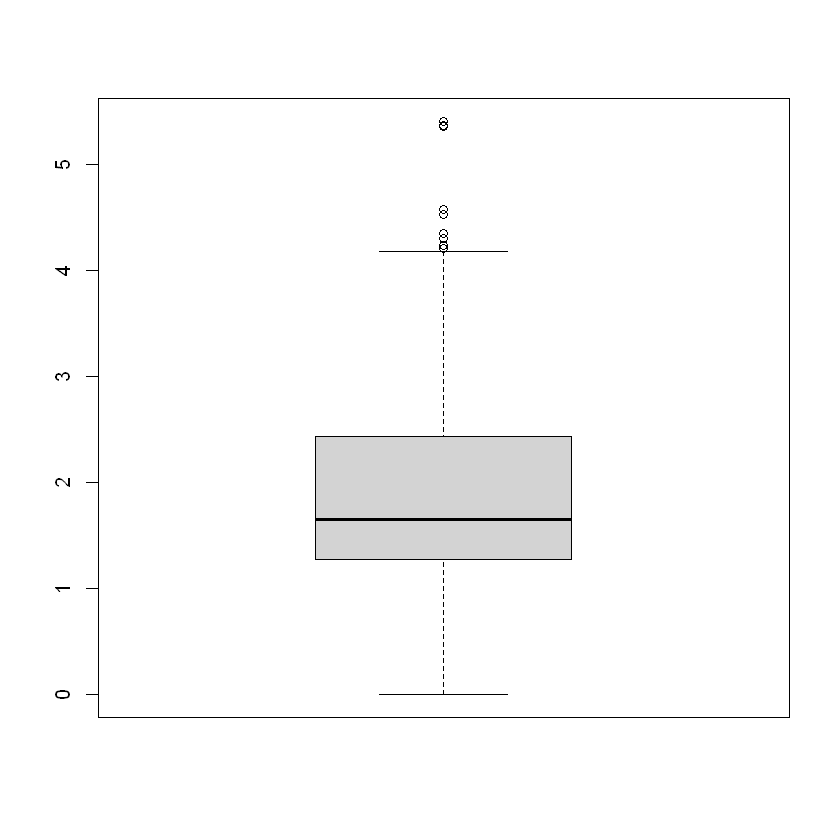

In [3]:
#Der erste Boxplot -"DIE PARTEI"
boxplot(data_Wahl$Die.PARTEI_Proz) 

# Der Boxplot

Wie wir aus den vorangegangenen *JupyterNotebooks* bereits wissen, können wir das Diagramm noch weiter aufbereiten. Vorher schauen wir uns aber noch an, welche Informationen ein Boxplot bietet. *Boxplots* geben Auskunft über *Streuungs- und Lagemaße* der Verteilung einer numerischen Variablen. Sie geben einen Überblick, in welchem Bereich die Daten einer Verteilung liegen. 

In unserem Beispiel veranschaulicht der Boxplot die Verteilung der Wahlergebnisse in den Stimmmbezirken in Bielefeld (Bundestagswahl 2017) von der Partei *Die Partei* (Erststimmen; prozentuale Angaben). Um Daten mit einem Boxplot visualisieren zu können, müssen diese mindestens *ordinalskaliert* sein.

# Der Aufbau eines Boxplot 

<img width="400" align = "right" hspace="40" src="Boxplot_Die_Partei_erklaert2.png"/> 

<div style="text-align: left" style=“line-height: 150%“ style="padding: 15px" >
<p>
<p> </p>

Ein Boxplot besteht aus der Box, <i>den Whiskern</i>  (den Antennen an der Box), dem Median und, sofern vorhanden, den Ausreißern, welche durch Punkte dargestellt werden.

- **Die Box**      
Innerhalb der Box liegen die mittleren 50% der Werte der betrachteten Variablen. Sie wird durch das *erste* (Q1) und das *dritte Quartil* (Q3) begrenzt. Unter dem ersten Quartil liegen 25% der Werte der Verteilung und unter dem dritten Quartil (die obere Grenze der Box) liegen 75% der Verteilung.
<p> </p>    
- **Der Median**   
Der Median der Variablen liegt innerhalb der Box und stellt die Grenze für das zweite Quartil dar. Außerdem teilt der Median die Daten. 50% der Daten liegen oberhalb des Medians und 50% liegen unterhalb des Medians. In der Box wird er mit einer horizontalen schwarzen Linie gekennzeichnet. Die Position des Medians in der Box zeigt an, ob die Werte symmetrisch verteilt sind.
<p> </p>    
- **Die Whisker (Antennen)**    
Die Whisker  setzen an den Grenzen der Box an. Ihre Länge wird von R, sofern wir das nicht verändern, automatisch  auf das anderthalbfache des Interquartilsabstandes (IQR, Interquartil Range) festgelegt (IQR * 1,5). Der Interquartilsabstand wird berechnet, indem der Wert des ersten Quartils vom Wert des dritten Quartils subtrahiert wird. Die Enden der Whisker zeigen das Minimum (unterer Whisker) und das Maximum (oberer Whisker) an, sofern keine Ausreißer vorhanden sind. Gibt es in der Verteilung Werte, die über die Whisker hinausragen, spricht man von Ausreißern, die entferntesten Ausreißer sind dann entsprechenend Minimum und Maximum.
<p> </p>        
- <b>Die Ausreißer</b>  
<i>Ausreißer</i> sind Werte, die das anderthalbfache des IQR überschreiten und somit über die Whisker hinausreichen. Sie werden meist als Punkte dargestellt.

  




# Der erste Boxplot aufbereitet
Hier nutzen wir einige Argumente, die wir bereits kennengelernt haben um den Boxplot weiter aufzubereiten. Neu sind für uns die Argumente `xaxs = "i"`, `yaxs = "i"` und `boxwex=0.4`.

- `xaxs ="i"`, `yaxs = "i"`: Diese Argumente legen fest, dass der Nullpunkt der x- und der y-Achse der Schnittpunkt der beiden Achsen ist. Wenn du dir den ersten Boxplot noch einmal ansiehst, kannst du erkennen, dass dies hier nicht der Fall ist und `x=0` und `y=0` nicht der Schnittpunkt der beiden Achsen ist.

- `boxwex=0.4`: Legt fest wie breit die Box des Boxplots ist.

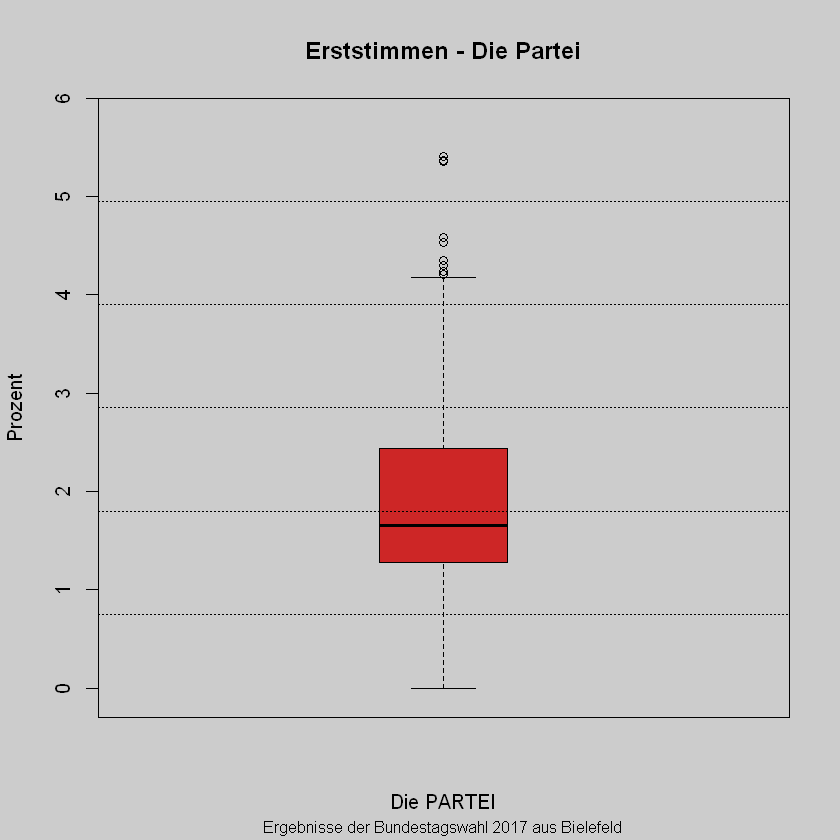

In [4]:
#Der erste Boxplot
par(bg = "gray80")
boxplot(data_Wahl$Die.PARTEI_Proz, 
        ylim =c(-0.3, 6), 
        xaxs ="i", yaxs = "i", 
        boxwex=0.4,
        col = c("firebrick3"),
        main="Erststimmen - Die Partei",cex.main = 1.2,
        sub = "Ergebnisse der Bundestagswahl 2017 aus Bielefeld",cex.sub = 0.8,
        xlab = "Die PARTEI",cex.axis = 1.0,
        ylab= "Prozent")
grid (-0.3,6, lty = 3, col = "black")


# Interpretation des ersten Boxplots
Der Boxplot stellt die Verteilung des Wahlergebnises (in Prozent) der *Bundestagswahl 2017* von *Die Partei* in den Bielefelder Stimmbezirken dar (Erststimmen). Der, durch die schwarze Linie gekennzeichnete Median, in der Mitte der Box, liegt bei ca. 1,6% - d.h. 50% der Stimmbezirke weisen ein Wahlergebnis von unter 1,6% auf und 50% Stimmbezirke weisen ein Wahlergebnis von über 1,6% bei den Erststimmen der Partei *Die Partei* auf. Die Box wird durch das erste und das dritte Quartil begrenzt. Das erste Quartil liegt bei ca. 1,3% und das dritte Quartil 2,45%. Hieraus lässt sich der Interquartilsabstand von ca. 1,15% ablesen. Dies bedeutet, dass die mittleren 50% der Stimmbezirke ein Ergebnis von 1,3% bis 2,45% bei den Erststimmen der Partei *Die Partei* aufweisen. Weiter lässt sich die Aussage treffen, dass in 25% der Stimmbezirke *Die Partei* ein Wahlergebnis von über 2,45% bei den Erststimmen erzielt hat. Außerdem kann abgelesen werden, dass in 25% der Stimmbezirke in Bielefeld *Die Partei* ein Wahlergebnis von unter 1,3% bei den Erststimmen erzielt hat. Ab einem Wahlergebnis von mehr als ca 4,2% beginnen oberhalb des oberen Whiskers die *Ausreißer*, sie sind über das anderthalbfache des IQRs entfernt. Die Spannweite beträgt rund 5,4%. 

# Variante Boxplot zur Wahlbeteiligung 

[1] "numeric"

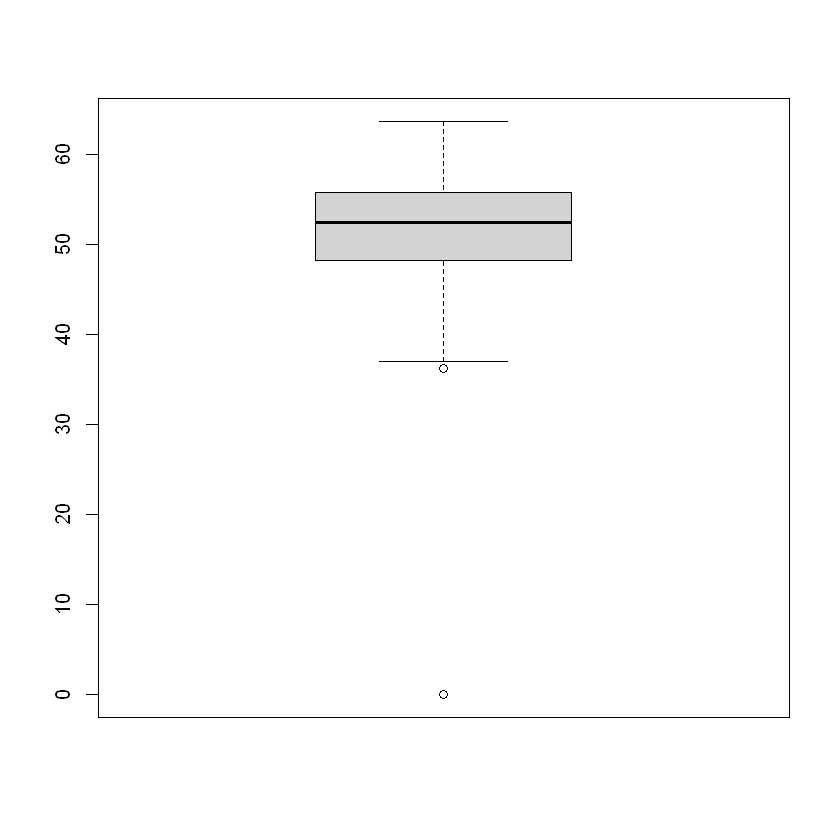

In [5]:
#Wahlbeteiligung in den Wahlbezirken
class(data_Wahl$Wahlbeteiligung)
boxplot(data_Wahl$Wahlbeteiligung)

Wenn wir diesen Boxplot betrachten fällt uns auf, dass dieser einen sehr starken Ausreißer nach unten aufweist. Bei einem Blick in die Daten mit dem DatenViewer oder aber in die Origninale CSV-Datei können wir erkennen, dass in den *Briefwahlbezirke* keine Wahlbeteiligung erfasst wurde bzw. diese bei 0% liegt. Die Erklärung hierfür liegt darin, dass Briefwahlbezirke von Ihrer Größe nicht vordefiniert und variabel in ihrer Größe sind, somit kann hier keine Wahlbeteiligung ausgewiesen werden.
Wir streichen daher die Briefwähler*innen aus unser Betrachtung und erstellen einen Datensatz ohne sie.

In [6]:
#Wahlbeteiligung ohne Briefwahl
data_Wahl_ohne_Brief <- subset(data_Wahl, Wahlbeteiligung>0)

Jetzt können wir die Wahlbeteiligung ohne die Briefwahlbezirke mit einem Boxplot betrachten und interpretieren. Mit Hilfe von outcol="firebrick3" färben wir die Ausreißerwerte rot ein.


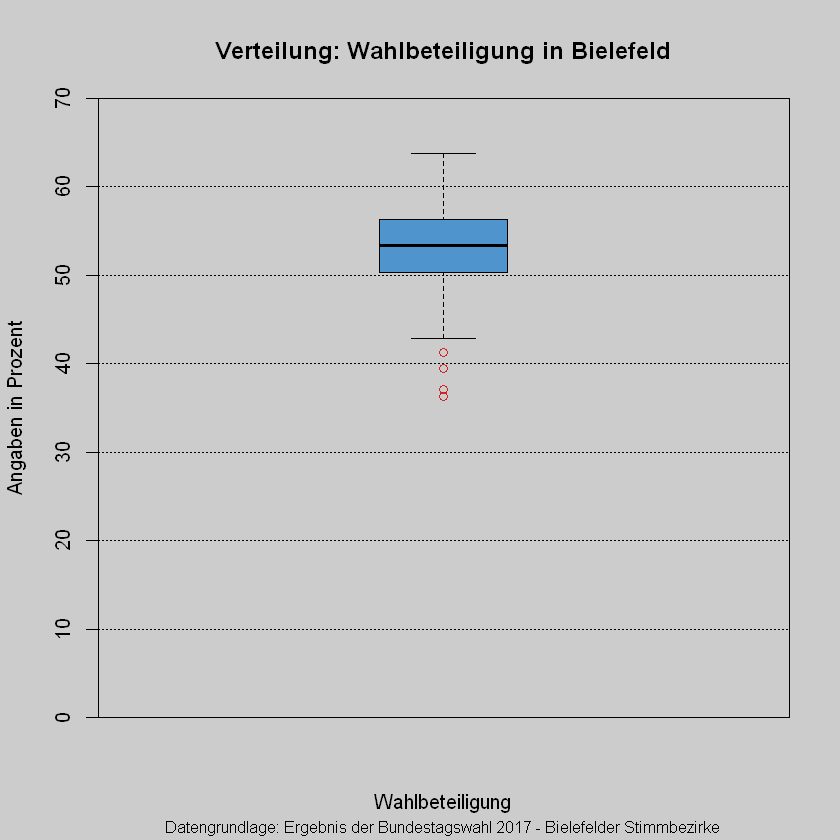

In [7]:
#Boxplot Wahlbeteiligung ohne Briefwahl
par(bg = "gray80")
boxplot(data_Wahl_ohne_Brief$Wahlbeteiligung, ylim= c(0, 70), 
        outcol="firebrick3",
        boxwex=0.4, xaxs ="i", yaxs = "i",
        xlab = "Wahlbeteiligung", ylab = "Angaben in Prozent",
        main="Verteilung: Wahlbeteiligung in Bielefeld",cex.main = 1.2,
        sub = "Datengrundlage: Ergebnis der Bundestagswahl 2017 - Bielefelder Stimmbezirke",cex.sub = 0.8,
        col=c("steelblue3"))
grid (0,7, lty = 3, col = "black")

Wir können die Whisker auch so anpassen, dass diese von ihrer Länge her so lang sind, dass das Boxplot ohne Ausreißer dargestellt wird. Die Ausreißer-Werte sind dann in den Whiskern enthalten und begrenzen diese in ihrer Länge. Hierzu können wir das Argument range= nutzen und dieses in der Höhe variieren um den Wert zu ermitteln, bei dem keine Ausreißer-Werte mehr dargestellt werden. 

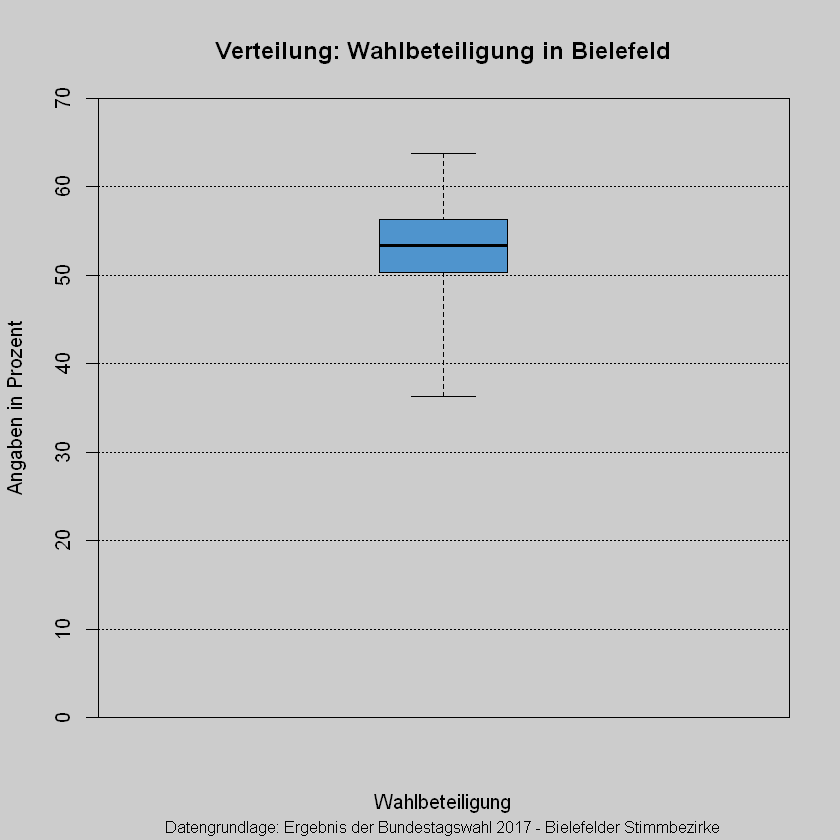

In [8]:
#Ausreißer innerhalb der Whisker
par(bg = "gray80")
boxplot(data_Wahl_ohne_Brief$Wahlbeteiligung, ylim= c(0, 70), range=3,
        boxwex=0.4, xaxs ="i", yaxs = "i",
        xlab = "Wahlbeteiligung", ylab = "Angaben in Prozent",
        main="Verteilung: Wahlbeteiligung in Bielefeld",cex.main = 1.2,
        sub = "Datengrundlage: Ergebnis der Bundestagswahl 2017 - Bielefelder Stimmbezirke",cex.sub = 0.8,
        col=c("steelblue3"))
grid (0,7, lty = 3, col = "black")

# Interpretation des Boxplots Wahlbeteiligung
Der Boxplot stellt die Wahlbeteiligung (in Prozent) der *Bundestagswahl 2017* in den *Bielefelder Stimmbezirken* dar. Der durch die schwarze Linie gekennzeichnete Median in der Mitte der Box liegt bei ca. 53% d.h. 50% der Stimmbezirke weisen eine Wahlbeteiligung von unter 53% auf und 50% Stimmbezirke weisen eine Beteiligung von über 53% auf. Die Box wird durch das erste und das dritte Quartil begrenzt. Das erste Quartil liegt bei ca. 50,5% und das dritte Quartil bei ca. 56%. Hieraus lässt sich der Interquartilsabstand von ca. 5,5% ablesen. Dies bedeut, dass die mittleren 50% der Stimmbezirke eine Wahlbeteiligung von 50,5% bis 56% aufweisen. Weiter lässt sich die Aussage treffen, dass die obersten 25% der Stimmbezirke eine Wahlbeteiligung von über 56% haben. Außerdem kann erkannt werden, dass 25% der Stimmbezirke in Bielefeld eine Wahlbeteiligung von unter 50,5% aufweisen. Ab einer Wahlbeteiligung von weniger als 46% beginnen unterhalb des unteren Whiskers die Ausreißer, sie sind das anderthalbfache des IQRs von der Box entfernt.
Die Spannweite beträgt rund 35%. Der obere Whisker endet bei 68% und nach unten ist das Minimum des Boxplots 33%.

# Mehrere Boxplots
Wir können außerdem mehrere Boxplots in einer Grafik anzeigen. Hierzu erstellen wir einen Datensatz, der die Daten der Erststimmen der Parteien enthält, die in den Bundestag eingezogen sind. Anschließend erstellen wir mit diesem Datensatz eine Visualisierung mit Boxplots.


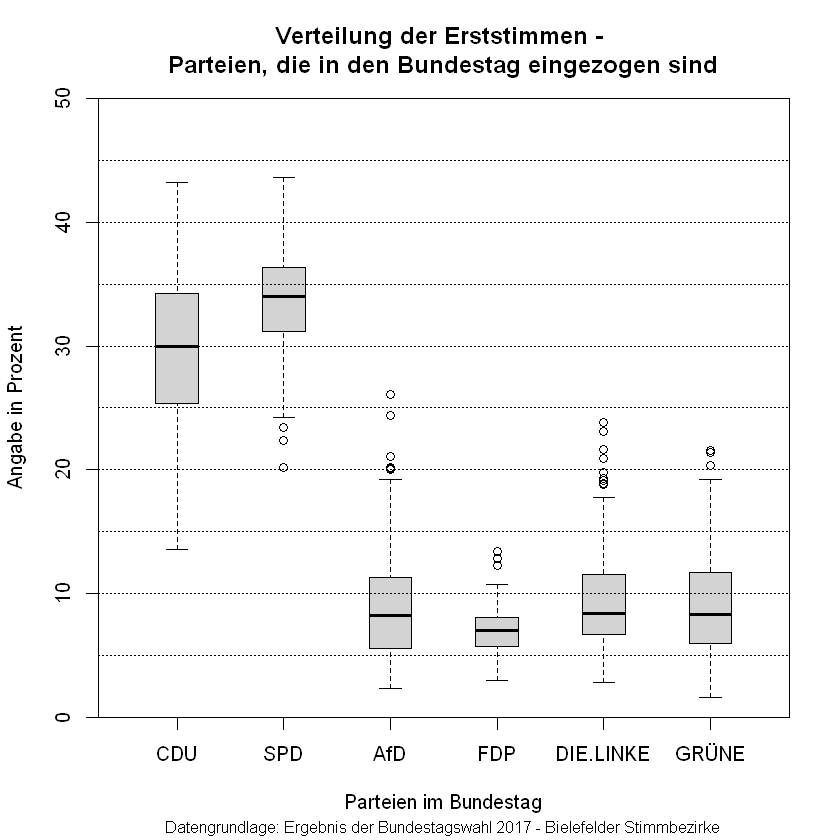

In [9]:
#Datensatz mit den Parteien die in den Bundestag eingezogen sind erstellen
data_Bund <- (data.frame(data_Wahl$CDU_Proz,data_Wahl$SPD_Proz, data_Wahl$AfD_Proz, data_Wahl$FDP_Proz, data_Wahl$DIE.LINKE_Proz,data_Wahl$GRÜNE_Proz))

#Boxplot mit  mit den Parteien die in den Bundestag eingezogen sind
#Grautoene
boxplot(data_Bund, ylim= c(0, 50), boxwex=0.4, xaxs ="i", yaxs = "i",
        xlab = "Parteien im Bundestag", ylab = "Angabe in Prozent",
        main= "Verteilung der Erststimmen - \nParteien, die in den Bundestag eingezogen sind",cex.main = 1.2,
        sub = "Datengrundlage: Ergebnis der Bundestagswahl 2017 - Bielefelder Stimmbezirke",cex.sub = 0.8,
        names = c("CDU", "SPD", "AfD", "FDP", "DIE.LINKE", "GRÜNE"))
grid (0,10, lty = 3, col = "black")

Die Visualsierung ist in Grautönen gehalten und somit auch für Menschen mit *Farbfehlsichtigkeit* zugänglich. Gerade bei Visualisierungen bei denen es um politische Parteien geht werden aber auch oft die jeweiligen Parteifarben für die Visualisierung genutzt.
Eine entsprechende Variante des Boxplots erstellen wir mit dem folgenden Skriptteil. Wir nutzen hier die Hexa-Farbcodes der Parteien.

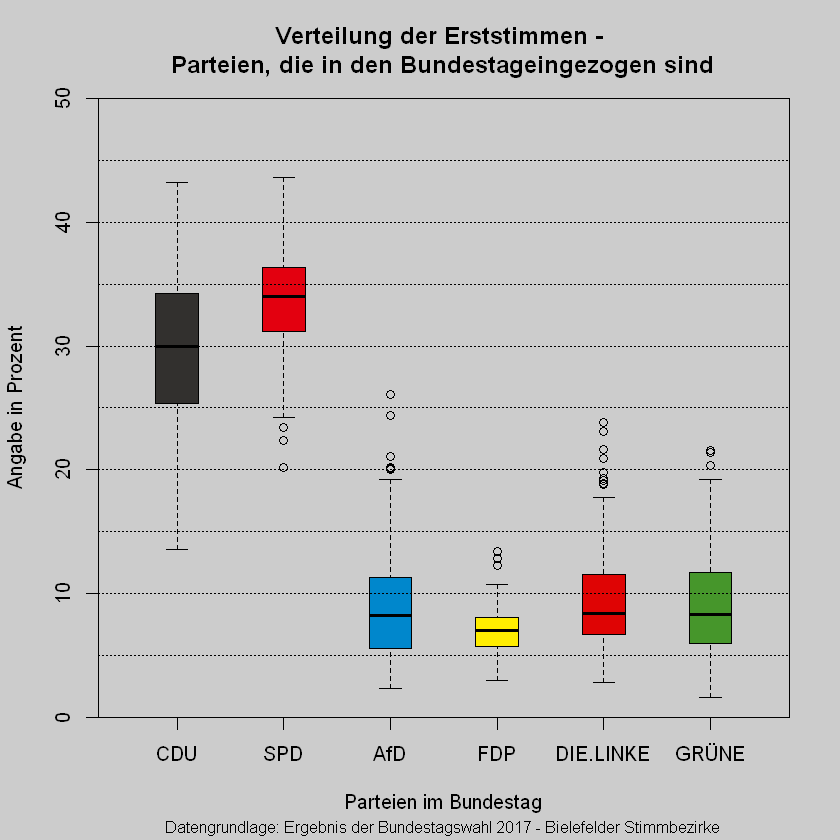

In [10]:
#Datensatz mit den Parteien, die in den Bundestag eingezogen sind erstellen
data_Bund <- (data.frame(data_Wahl$CDU_Proz,data_Wahl$SPD_Proz, data_Wahl$AfD_Proz, data_Wahl$FDP_Proz, data_Wahl$DIE.LINKE_Proz,data_Wahl$GRÜNE_Proz))

#Farbig - klassische Farben der Parteien
par(bg = "gray80")
boxplot(data_Bund, ylim= c(0, 50), boxwex=0.4, xaxs ="i", yaxs = "i",
        xlab = "Parteien im Bundestag", ylab = "Angabe in Prozent",
        main="Verteilung der Erststimmen - \nParteien, die in den Bundestageingezogen sind",cex.main = 1.2,
        sub = "Datengrundlage: Ergebnis der Bundestagswahl 2017 - Bielefelder Stimmbezirke",cex.sub = 0.8,
        names = c("CDU", "SPD", "AfD", "FDP", "DIE.LINKE", "GRÜNE"),
        col = c("#32302E", "#E3000F", "#0087CC", "#FFED00", "#DF0404", "#46962B"))
grid (0,10, lty = 3, col = "black")

# Mehrere Boxplots in einer Grafik
Ein breiter *Interquartilsbereich*, also eine hohe Box, zeigt an, dass die Streuung groß ist und sich die Stimmbezirke hinsichtlich der Erststimmen für die jeweils betrachtete Partei sehr unterscheiden. Ein kleiner IQR bedeutet hingegen, dass sich die Stimmbezirke hinsichtlich der Erststimmenverteilung recht ähnlich sind. Hier von ausgehend lässt sich festhalten, dass die Erststimmenverteilung der CDU die höchste Box hat deren IQR 9,4 Prozentpunkte beträgt (erstes Quartil:25,1% - drittes Quartil: 34,5%). Den kleinsten IQR der Erststimmen hat die Box der FDP mit  ca. 2,5 Prozentpunkten (erstes Quartil:5,5% - drittes Quartil: 8%). Die Wahlergebnisse der CDU unterscheiden sich also mehr in den Stimmbezirken als die Wahlergebnisse der FDP in den Stimmbezirken.
Der Median der SPD liegt bei rund 34%, er ist damit am höchsten im Vergleich zu den anderen Parteien. Den niedrigsten Median hat im Vergleich die FDP der bei ca. 7,4% liegt. Die SPD ist die einzige Partei deren Boxplot Ausreißer nach unten aufweist, also Stimmbezirke die mit ihrem Wahlergebnis mehr als das Anderthalbfache des IQR abweichen. Der niedrigste Ausreißer liegt bei rund 20%. Im Vergleich der sogenannten *Volksparteien* (CDU,SPD) hat die *SPD* die weniger hohe Box und somit eine kleinere Streuung hinsichtlich des Wahlergebnisses der Erststimmen in den Stimmbezirken.
Relativ ähnlich hinsichtlich der Streuung sind sich die *AfD* und die *Grünen*. Ihr Minimum liegt bei 2,5% (AfD) bzw. 2,4% (Grüne) und ihr oberer Whisker liegt bei rund 19%. Auch die IQRs sind relativ ähnlich. Das erstes Quartil der AfD liegt bei 8% und das dritte Quartil bei 11,25%. Bei den Grünen liegt das erstes Quartil bei rund 8,25% und das drittes Quartil ebenfalls bei ca. 11,25%. Einzig bei den Ausreißern nach oben unterscheiden sich die beiden Parteien. Hier weißt die AfD mit rund 26% den höchsten Ausreißer nach oben auf. 
Die Partei "Die Linke" besitzt die meisten Ausreißer nach oben. Fast gleich sind der Median der Linken und der Grünen. Bei der Linke liegt dieser bei 8,4% und bei den Grünen bei rund 8,7%. Die Grünen weisen im Vergleich zur Linken die höhere Streuung hinsichtlich der Verteilung des Wahlergebnisses der Stimmbezirke auf, da der Boxplot der Grünen samt Whiskern höher ist als das der Linken.

# Violin Plots
<img width="380" align = "right" hspace="40" src="Violinplot_Verteilungen.png"/> 

<div style="text-align: left" style=“line-height: 150%“>
<p>
<p> </p>    
Ein <i>Violin-Plot</i> ähnelt einem Boxplot, allerdings mit der Ausnahme, dass zusätzlich die <i>Wahrscheinlichkeitsdichte</i> der Verteilung der Variablen angezeigt wird. Die Breite der <i>Violine</i> zeigt die Höhe dieser Wahrscheinlichkeit an, breitere Bereiche weisen hierbei eine höhere Wahrscheinlichkeit auf als niedrigere Bereiche. Im Gegensatz zu Boxplots haben Violinplots somit den Vorteil, dass sie die gesamte Verteilung der Daten zeigen und eine Aussage über die Art der Verteilung einer Variablen erlauben (z.B. <i>Normalverteilung, bivariate Verteilung, uniforme Verteilung</i>). Bezogen auf die Wahlbeteiligung bedeutet dies, dass die Breite der "Violine" anzeigt, wie wahrscheinlich eine bestimmte Wahlbeteiligungshöhe über alle Bielefelder Stimmbezirke ist. 
    
Abbildung rechts adaptiert nach https://datavizpyr.com/violinplot-vs-boxplot-when-violinplot-can-be-more-useful/    
    

Um *Violin Plots* in R plotten zu können, laden wir zunächst das Paket vioplot() und erstellen anschließend unseren erstes Violinplot für die Wahlbeteiligung der Bielefelder Stimmbezirke.

<p>

Warning message:
"Paket 'vioplot' wurde unter R Version 4.1.2 erstellt"
Lade nötiges Paket: sm

Warning message:
"Paket 'sm' wurde unter R Version 4.1.2 erstellt"
Package 'sm', version 2.2-5.7: type help(sm) for summary information

Lade nötiges Paket: zoo


Attache Paket: 'zoo'


Die folgenden Objekte sind maskiert von 'package:base':

    as.Date, as.Date.numeric




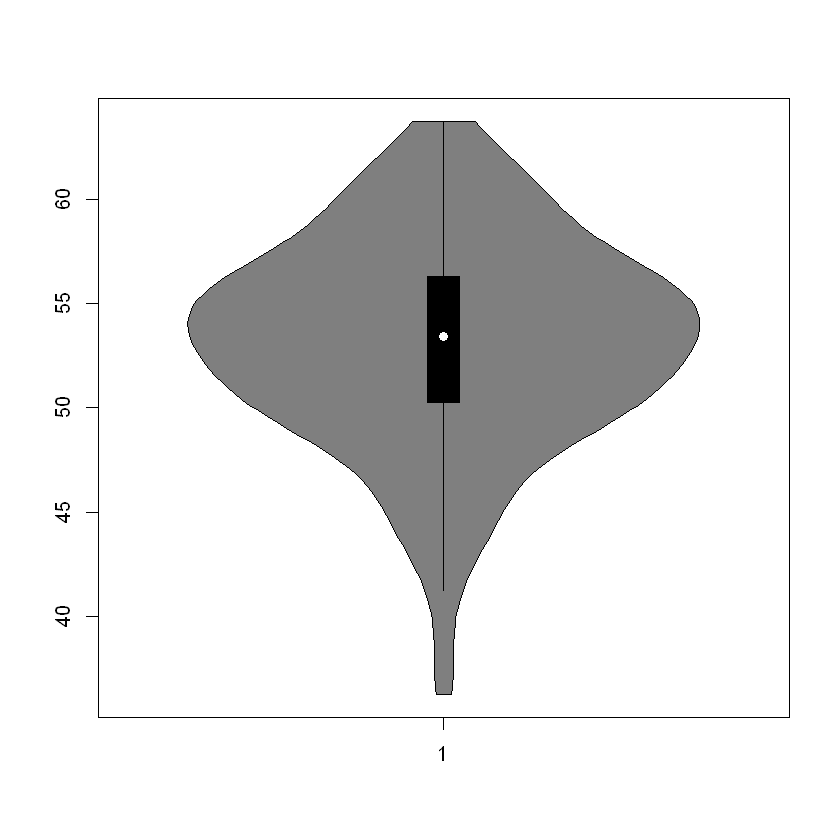

In [11]:
#benoetigte Pakete laden
library(vioplot)

#Erstes Violin Plot
vioplot(data_Wahl_ohne_Brief$Wahlbeteiligung)



# Violinplot Aufbau
Der Vioplot ähnelt auch im Aufbau einem Boxplot.

* **Box**
Innerhalb der Box liegen die mittleren 50% der Werte der betrachteten Variablen. Sie wird durch das erste und das dritte Quartil begrenzt. Unter dem erste Quartil liegen 25% der Werte der Verteilung und unter dem dritten Quartil (die obere Grenze der Box) liegen 75% der Verteilung.
<p> </p> 

* **Median (hier als Punkt in der Box dargestellt)**
Der Median der Variablen liegt innerhalb der Box und stellt die Grenze für das zweite Quartil wieder. Außerdem teilt der Median die die Daten. 50% der Daten liegen oberhalb des Medians und 50% liegen unterhalb des Medians. In der Box wird er mit einem Punkt dargestellt. 
<p> </p> 
* **Whisker** 
Die Whisker setzen an den Grenzen der Box an. Ihre Länge wird von R, sofern wir das nicht verändern, automatisch  auf das anderthalbfache des Interquartilsabstandes (IQR) festgelegt (IQR*1,5). Der Interquartilsabstand wird berechnet indem der Wert des ersten Quartils vom Wert des dritten Quartils subtrahiert wird. Die Enden der Whisker bilden das Minimum (unterer Whisker) und das Maximum (oberer Whisker).

Mit Hilfe eines statistischen Verfahrens, der *Kerndichteschätzung*, wird der Violin Plot ergänzt. Dieses statistische Verfahren schätzt die Wahrscheinlichkeitsdichte der Variablen und zeigt die Verteilungsform der Daten in Form von breiter bzw. schmaler werdenden Abschnitten in der Grafik. So kann beispielsweise die Namensgebende *Violinenform* entstehen. 

# Veranschaulichung: Wahlbeteiligung mit Briefwahlbezirken 

Inhaltlich ist das folgende Visualisierungsbeispiel *nicht sinnvoll (!)*,  es verdeutlicht aber, wie ein Violinplot anzeigen kann, wie sich die Werte einer Verteilung verteilen, also ob diese beispielsweise um den Median herum angeordnet sind oder um andere Punkte der Verteilung. Wir betrachten hier die Wahlbeteiligung mit den Briefwahlbezirken (deren Wahlbeteiligung bei 0 Prozent liegt).

Mit der Wahlbeteiligung von 0 Prozent in den Briefwahlbezirken haben wir einen Peak-Bereich um das Minimum der Verteilung als auch einen Peak-Bereich um den Median herum.

*Nochmal der Hinweis, diese Darstellung dient nur der Veranschaulichung!*

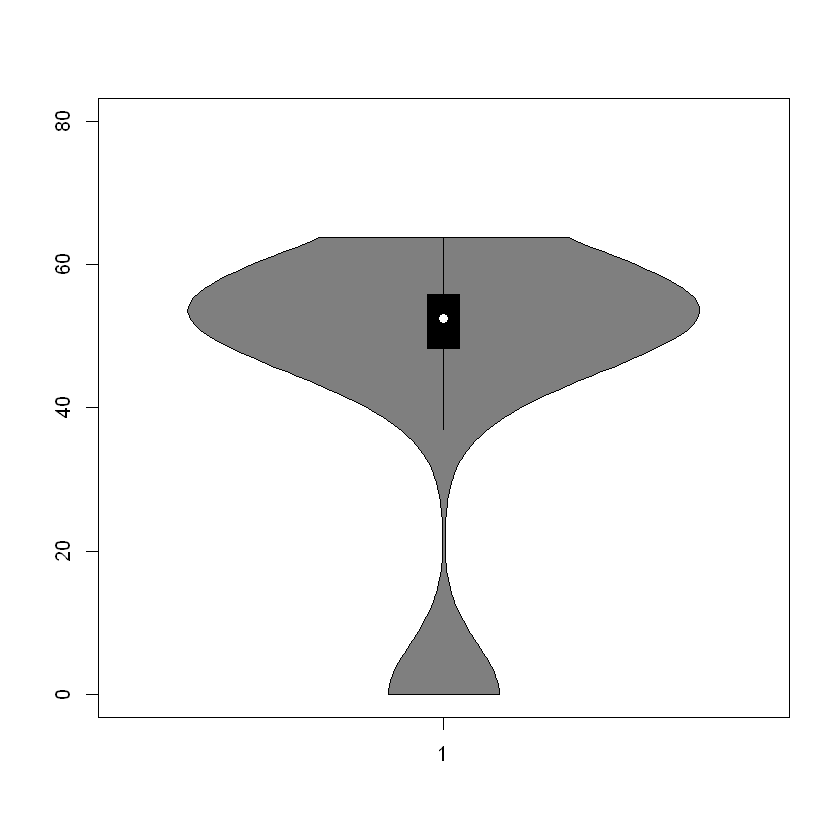

In [12]:
# nur zur Veranschaulichung: Wahlbeteiligung mit Briefwahlbezirken 
vioplot (data_Wahl$Wahlbeteiligung, ylim = c(0,80))

# Mehrere Violin Plots
Wie auch bei den Boxplots lassen sich mehrere Violin Plots zusammen darstellen. Wir nutzen hierfür wieder unseren Datensatz mit den Parteien, die in den Bundestag eingezogen sind. 

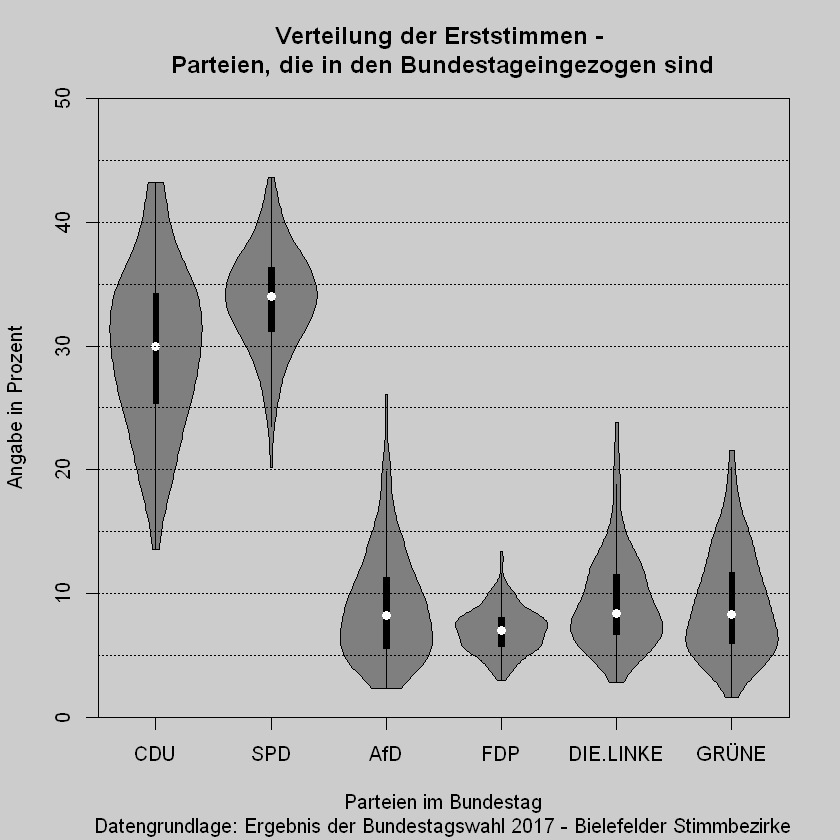

In [13]:
#mehrere Vioplots mit den Parteien die in den Bundestag eingezogen sind
par(bg = "gray80")
vioplot(data_Bund, ylim= c(0, 50), xaxs ="i", yaxs = "i",
         xlab = "Parteien im Bundestag", ylab = "Angabe in Prozent",
         main="Verteilung der Erststimmen - \nParteien, die in den Bundestageingezogen sind",cex.main = 1.2,
         sub = "Datengrundlage: Ergebnis der Bundestagswahl 2017 - Bielefelder Stimmbezirke",cex.sub = 0.8,
         names = c("CDU", "SPD", "AfD", "FDP", "DIE.LINKE", "GRÜNE"))
grid (0,10, lty = 3, col = "black")

# Mehrere Violin Plots

Wie auch beim Vergleich der Boxplots kann bei den Violin Plots ein Vergleich hinsichtlich der Höhe der Boxen, also hinsichtlich der Streuungsunterschiede, hinsichtlich der Mediane und auch der Whisker vorgenommen werden. Der *Violin Plot* zeigt aber zusätzlich die Verteilungsform der Daten an d.h. die breiteren Bereiche des Violinen-Diagramms zeigen eine höhere Wahrscheinlichkeitsdichte an und schmale Bereiche eine geringere Wahrscheinlichkeitsdichte. 

Wir können so erkennen, dass bei der Verteilung der Erststimmen der SPD die meisten Werte um den Median herum liegen, bei der CDU hingegen liegen die meisten Werte knapp über dem Median. Bei CDU und SPD können wir außerdem festhalten, dass die Wahrscheinlichkeitsdichte der Werte oberhalb und unterhalb des Medians relativ ähnlich ist. Die Verteilung der Erststimmen der anderen Parteien unterscheidet sich von der Verteilung der beiden *Volksparteien* - AfD, Die Linke und auch die Grünen laufen in ihren Verteilungen nach oben wesentlich spitzer zu und weisen nicht diese (angenährt) symetrische Verteilung auf. Das was bei den Boxplots durch die Ausreißer nach oben dargestellt wird, führt bei den Violin Plots zu den langen nach oben gezogenen Spitzen. 

# Literatur und Datensätze

* https://r-graph-gallery.com/boxplot.html
* https://r-graph-gallery.com/violin
* https://www.data-to-viz.com/#boxplot
* https://www.data-to-viz.com/#violin

**Datensätze**
* [Wahlergebnisse in Bielefeld 2017](https://open-data.bielefeld.de/dataset/wahlergebnisse-bielefeld-2017),Stadt Bielefeld, Presseamt/Statistikstelle,[CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/)
